In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import os
import sys
import json
sys.path.append('F:\Linux')
import illustris_python as il

def LoadMergHist(simu, subhaloID):
    '''
    return subhalo's main progenitor and merger history with snapshot
    '''
    if simu == 'TNG':
        ldir = 'f:/Linux/localRUN/tng_DiskMerTree/%d.json' % subhaloID
    else:
        ldir = 'f:/Linux/localRUN/il1_DiskMerTree/%d.json' % subhaloID
    
    with open(ldir) as f:
        data = json.load(f)
    
    Main = np.array(data['Main'])
    return dict(zip(Main[:, 0], Main[:, 1])), np.array(data['Mergers'])

def ErrorBarMedian(data):
    #return 25%, 50%, 75%
    if len(data) == 0:
        return 0, 0, 0
    elif len(data) < 3:
        return 0, np.median(data), 0
    else:
        data.sort()
        return data[int(len(data) / 4)], np.median(data), data[int(len(data) * 0.75)]


tng_barID = np.load('f:/Linux/localRUN/barredID_4WP_TNG.npy')
tng_diskID = np.load('f:/Linux/localRUN/diskID_4WP.npy')
il1_barID = np.load('f:/Linux/localRUN/barredID_il1.npy')
il1_diskID = np.load('f:/Linux/localRUN/diskID_il1.npy')

il1_snapshot = [135, 127, 120, 113, 103, 108, 95, 85, 75, 68]
tng_snapshot = [99, 91, 84, 78, 72, 67, 59, 50, 40, 33]
Redshift = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 1.0, 1.5, 2.0]
il1_toZ = dict(zip(il1_snapshot, Redshift))
tng_toZ = dict(zip(tng_snapshot, Redshift))

il1_star = {}
il1_gas = {}
for snap in il1_snapshot:
    data = il.func.loadSubhalos('il1', snap, 'SubhaloMassInRadType') / 0.704
    star = data[:, 4]
    star = np.log10(star * 10 ** 10)
    star[np.isinf(star)] = 0

    gas = data[:, 0]
    gas = np.log10(gas * 10 ** 10)
    gas[np.isinf(gas)] = 0

    il1_star[snap] = star
    il1_gas[snap] = gas


tng_star = {}
tng_gas = {}
for snap in tng_snapshot:
    data = il.func.loadSubhalos('TNG', snap, 'SubhaloMassInRadType') / 0.6774
    star = data[:, 4]
    star = np.log10(star * 10 ** 10)
    star[np.isinf(star)] = 0

    gas = data[:, 0]
    gas = np.log10(gas * 10 ** 10)
    gas[np.isinf(gas)] = 0

    tng_star[snap] = star
    tng_gas[snap] = gas

d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in log10
d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log10
d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:68: RuntimeWarning: divide by zero encountered in log10
d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:72: RuntimeWarning: divide by zero encountered in log10


In [17]:
gasWithZ = {}
starWithZ = {}
for x in Redshift:
    gasWithZ[x] = []
    starWithZ[x] = []

In [18]:
ids = il1_diskID
for subID in ids:
    gas = []
    star = []
    prog = LoadMergHist('il1', subID)[0]
    plot = 1
    for snap in il1_snapshot:
        try:
            haloID = prog[snap]
        except:
            plot = 0
            break
        gas.append(il1_gas[snap][haloID])
        star.append(il1_star[snap][haloID])
    if plot:
        delta_gas = [gas[i] - gas[i+1] for i in range(len(gas)-1)] 
        delta_star = [star[i] - star[i + 1] for i in range(len(star) - 1)]
        for i in range(len(delta_gas)):
            gasWithZ[Redshift[i]].append(delta_gas[i])
            starWithZ[Redshift[i]].append(delta_star[i])

In [20]:
gasdata = [[], [], []]
stardata = [[], [], []]
for i in range(len(delta_gas)):
    d0, d1, d2 = ErrorBarMedian(gasWithZ[Redshift[i]])
    gasdata[0].append(d0)
    gasdata[1].append(d1)
    gasdata[2].append(d2)
    d0, d1, d2 = ErrorBarMedian(starWithZ[Redshift[i]])
    stardata[0].append(d0)
    stardata[1].append(d1)
    stardata[2].append(d2)
gasdata = np.array(gasdata)
stardata = np.array(stardata)

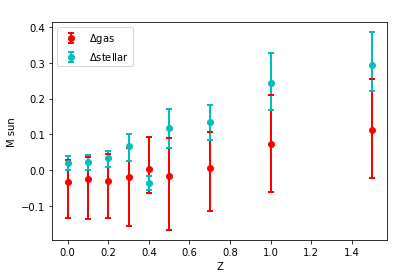

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('Z')
ax.set_ylabel('M sun')
ax.set_title(' ')

gasErr = np.vstack((gasdata[1,:] - gasdata[0,:], gasdata[2,:] - gasdata[1,:]))
starErr = np.vstack((stardata[1,:] - stardata[0,:], stardata[2,:] - stardata[1,:]))
#lines
ax.errorbar(Redshift[:-1], gasdata[1,:], yerr=gasErr, elinewidth=2, capthick=2, capsize=3, color='r', fmt='o', label=r'$\Delta$gas')
ax.errorbar(Redshift[:-1], stardata[1,:], yerr=starErr, elinewidth=2, capthick=2, capsize=3, color='c', fmt='o', label=r'$\Delta$stellar')
ax.legend()
plt.savefig('f:/Linux/local_result/il1_deltaGas.png',dpi=300)

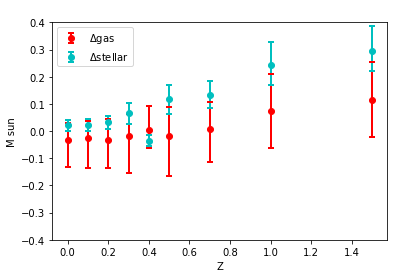

In [53]:
gasWithZ = {}
starWithZ = {}
for x in Redshift:
    gasWithZ[x] = []
    starWithZ[x] = []
    
ids = il1_diskID
for subID in ids:
    gas = []
    star = []
    prog = LoadMergHist('il1', subID)[0]
    plot = 1
    for snap in il1_snapshot:
        try:
            haloID = prog[snap]
        except:
            plot = 0
            break
        gas.append(il1_gas[snap][haloID])
        star.append(il1_star[snap][haloID])
    if plot:
        delta_gas = [gas[i] - gas[i+1] for i in range(len(gas)-1)] 
        delta_star = [star[i] - star[i + 1] for i in range(len(star) - 1)]
        for i in range(len(delta_gas)):
            gasWithZ[Redshift[i]].append(delta_gas[i])
            starWithZ[Redshift[i]].append(delta_star[i])
            
gasdata = [[], [], []]
stardata = [[], [], []]
for i in range(len(delta_gas)):
    d0, d1, d2 = ErrorBarMedian(gasWithZ[Redshift[i]])
    gasdata[0].append(d0)
    gasdata[1].append(d1)
    gasdata[2].append(d2)
    d0, d1, d2 = ErrorBarMedian(starWithZ[Redshift[i]])
    stardata[0].append(d0)
    stardata[1].append(d1)
    stardata[2].append(d2)
gasdata = np.array(gasdata)
stardata = np.array(stardata)

#plot info
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('Z')
ax.set_ylabel('M sun')
# ax.set_xlim(-0.4, 0.4)
ax.set_ylim(-0.4, 0.4)
ax.set_title(' ')

gasErr = np.vstack((gasdata[1,:] - gasdata[0,:], gasdata[2,:] - gasdata[1,:]))
starErr = np.vstack((stardata[1,:] - stardata[0,:], stardata[2,:] - stardata[1,:]))
#lines
ax.errorbar(Redshift[:-1], gasdata[1,:], yerr=gasErr, elinewidth=2, capthick=2, capsize=3, color='r', fmt='o', label=r'$\Delta$gas')
ax.errorbar(Redshift[:-1], stardata[1,:], yerr=starErr, elinewidth=2, capthick=2, capsize=3, color='c', fmt='o', label=r'$\Delta$stellar')
ax.legend()

plt.savefig('f:/Linux/local_result/new_il1_deltaGas.png',dpi=300)

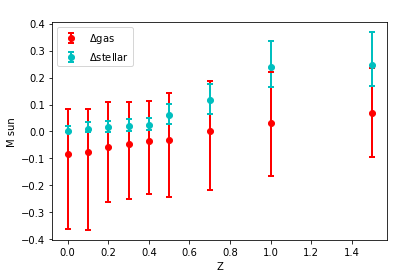

In [51]:
gasWithZ = {}
starWithZ = {}
for x in Redshift:
    gasWithZ[x] = []
    starWithZ[x] = []

ids = tng_diskID
for subID in ids:
    gas = []
    star = []
    prog = LoadMergHist('TNG', subID)[0]
    plot = 1
    for snap in tng_snapshot:
        try:
            haloID = prog[snap]
        except:
            plot = 0
            break
        gas.append(tng_gas[snap][haloID])
        star.append(tng_star[snap][haloID])
    if plot:
        delta_gas = [gas[i] - gas[i+1] for i in range(len(gas)-1)] 
        delta_star = [star[i] - star[i + 1] for i in range(len(star) - 1)]
        for i in range(len(delta_gas)):
            gasWithZ[Redshift[i]].append(delta_gas[i])
            starWithZ[Redshift[i]].append(delta_star[i])
            
gasdata = [[], [], []]
stardata = [[], [], []]
for i in range(len(delta_gas)):
    d0, d1, d2 = ErrorBarMedian(gasWithZ[Redshift[i]])
    gasdata[0].append(d0)
    gasdata[1].append(d1)
    gasdata[2].append(d2)
    d0, d1, d2 = ErrorBarMedian(starWithZ[Redshift[i]])
    stardata[0].append(d0)
    stardata[1].append(d1)
    stardata[2].append(d2)
gasdata = np.array(gasdata)
stardata = np.array(stardata)

#plot info
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('Z')
ax.set_ylabel('M sun')
ax.set_title(' ')

gasErr = np.vstack((gasdata[1,:] - gasdata[0,:], gasdata[2,:] - gasdata[1,:]))
starErr = np.vstack((stardata[1,:] - stardata[0,:], stardata[2,:] - stardata[1,:]))
#lines
ax.errorbar(Redshift[:-1], gasdata[1,:], yerr=gasErr, elinewidth=2, capthick=2, capsize=3, color='r', fmt='o', label=r'$\Delta$gas')
ax.errorbar(Redshift[:-1], stardata[1,:], yerr=starErr, elinewidth=2, capthick=2, capsize=3, color='c', fmt='o', label=r'$\Delta$stellar')

ax.legend()
plt.savefig('f:/Linux/local_result/TNG_deltaGas.png',dpi=300)

[[-0.15748377 -0.16047257 -0.15006365 -0.16318355 -0.07367992 -0.17264277
  -0.12202891 -0.06983858 -0.03499308]
 [-0.03681139 -0.02719693 -0.03211614 -0.02157494 -0.00053051 -0.01622789
   0.00599943  0.06659841  0.10675249]
 [ 0.03293423  0.0400813   0.05000695  0.06708404  0.09142216  0.09747916
   0.11635668  0.21021588  0.25093201]]


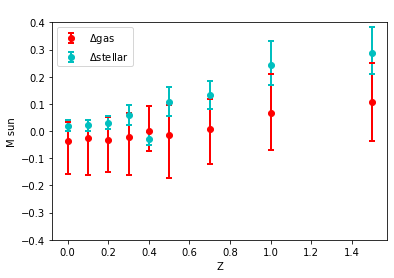

In [47]:
gasWithZ = {}
starWithZ = {}
for x in Redshift:
    gasWithZ[x] = []
    starWithZ[x] = []
    
ids = il1_diskID
for subID in ids:
    gas = []
    star = []
    prog = LoadMergHist('il1', subID)[0]
    plot = 1
    for snap in il1_snapshot:
        try:
            haloID = prog[snap]
        except:
            plot = 0
            break
        gas.append(il1_gas[snap][haloID])
        star.append(il1_star[snap][haloID])
    if plot:
        delta_gas = [gas[i] - gas[i+1] for i in range(len(gas)-1)] 
        delta_star = [star[i] - star[i + 1] for i in range(len(star) - 1)]
        for i in range(len(delta_gas)):
            gasWithZ[Redshift[i]].append(delta_gas[i])
            starWithZ[Redshift[i]].append(delta_star[i])
            
gasdata = [[], [], []]
stardata = [[], [], []]
for i in range(len(delta_gas)):
    d0, d1, d2 = ErrorBarMedian(gasWithZ[Redshift[i]])
    gasdata[0].append(d0)
    gasdata[1].append(d1)
    gasdata[2].append(d2)
    d0, d1, d2 = ErrorBarMedian(starWithZ[Redshift[i]])
    stardata[0].append(d0)
    stardata[1].append(d1)
    stardata[2].append(d2)
gasdata = np.array(gasdata)
stardata = np.array(stardata)

#plot info
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('Z')
ax.set_ylabel('M sun')
# ax.set_xlim(-0.4, 0.4)
ax.set_ylim(-0.4, 0.4)
ax.set_title(' ')

gasErr = np.vstack((gasdata[1,:] - gasdata[0,:], gasdata[2,:] - gasdata[1,:]))
starErr = np.vstack((stardata[1,:] - stardata[0,:], stardata[2,:] - stardata[1,:]))
#lines
ax.errorbar(Redshift[:-1], gasdata[1,:], yerr=gasErr, elinewidth=2, capthick=2, capsize=3, color='r', fmt='o', label=r'$\Delta$gas')
ax.errorbar(Redshift[:-1], stardata[1,:], yerr=starErr, elinewidth=2, capthick=2, capsize=3, color='c', fmt='o', label=r'$\Delta$stellar')
ax.legend()
print(gasdata)
# plt.savefig('f:/Linux/local_result/il1_deltaGas.png',dpi=300)

In [43]:
bar2bar = np.load('F:/npy/bar2bar.npy',allow_pickle=1).item()
bar2disk = np.load('f:/npy/bar2no.npy',allow_pickle=1).item()

In [44]:
len(bar2disk.keys())

243

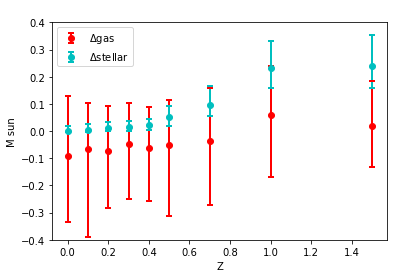

In [55]:
gasWithZ = {}
starWithZ = {}
for x in Redshift:
    gasWithZ[x] = []
    starWithZ[x] = []
    
for subID in bar2disk.keys():
    gas = []
    star = []
    prog = LoadMergHist('TNG', subID)[0]
    plot = 1
    for snap in tng_snapshot:
        try:
            haloID = prog[snap]
        except:
            plot = 0
            break
        gas.append(tng_gas[snap][haloID])
        star.append(tng_star[snap][haloID])
    if plot:
        delta_gas = [gas[i] - gas[i+1] for i in range(len(gas)-1)] 
        delta_star = [star[i] - star[i + 1] for i in range(len(star) - 1)]
        for i in range(len(delta_gas)):
            gasWithZ[Redshift[i]].append(delta_gas[i])
            starWithZ[Redshift[i]].append(delta_star[i])
            
gasdata = [[], [], []]
stardata = [[], [], []]
for i in range(len(delta_gas)):
    d0, d1, d2 = ErrorBarMedian(gasWithZ[Redshift[i]])
    gasdata[0].append(d0)
    gasdata[1].append(d1)
    gasdata[2].append(d2)
    d0, d1, d2 = ErrorBarMedian(starWithZ[Redshift[i]])
    stardata[0].append(d0)
    stardata[1].append(d1)
    stardata[2].append(d2)
gasdata = np.array(gasdata)
stardata = np.array(stardata)

#plot info
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('Z')
ax.set_ylabel('M sun')
# ax.set_xlim(-0.4, 0.4)
ax.set_ylim(-0.4, 0.4)
ax.set_title(' ')

gasErr = np.vstack((gasdata[1,:] - gasdata[0,:], gasdata[2,:] - gasdata[1,:]))
starErr = np.vstack((stardata[1,:] - stardata[0,:], stardata[2,:] - stardata[1,:]))
#lines
ax.errorbar(Redshift[:-1], gasdata[1,:], yerr=gasErr, elinewidth=2, capthick=2, capsize=3, color='r', fmt='o', label=r'$\Delta$gas')
ax.errorbar(Redshift[:-1], stardata[1,:], yerr=starErr, elinewidth=2, capthick=2, capsize=3, color='c', fmt='o', label=r'$\Delta$stellar')
ax.legend()
plt.savefig('f:/Linux/local_result/tng_matched_barrred_deltaGas.png',dpi=300)

In [57]:
il1_halolen = il.func.loadSubhalos('il1', 103, 'SubhaloLenType')[:, 4]
ind = np.array(range(len(il1_halolen)))
il1_stellarGt4WP  = ind[il1_halolen >= 40000]

In [60]:
il1_stellarGt4WP

array([     0,      1,      2, ..., 364494, 366757, 372000])